# Project Part 1

B) An exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis.

## Introduction/Background

In this notebook, I cover the exploratory data analysis (EDA) portion of my natural language processing project,
which aims to train a deep learning model in the recognition of emotion. Through employing the _Lexicon/AFINN_
dataset, which is a list of English language words and their positive or negative intensity
from -5 (__Most Negative__) to +5 (__Most Positive__), I will examine the depth of the data provided by
the _Statements_ dataset. The _Statements_ dataset is a compiled list of English language statements,
many of which are not complete sentences, as well as the emotion that best fits them.

## Exploratory Data Analysis

* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [27]:
# EDA imports
import matplotlib as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

# Unused Imports (subject to change):
# from tqdm import tqdm, tqdm_pandas
# import sklearn, gensim, wordcloud
# import textblob, spacy, textstat

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Read the datasets into Pandas DataFrame objects from CSV
statements = pd.read_csv("dataset/Statements/Data-all.csv")
lexicon = pd.read_csv("dataset/Lexicons/afinn.csv")

In [30]:
# Create a dictionary from lexicon to help accelerate computation
afinnDict = dict(zip(lexicon.word, lexicon.value))

# Apply a transformation that sums the lexicon's values of each word and writes it into a Pandas Series datatype
stmtAfinnValues = pd.Series(statements.Statement.apply(lambda stmt: sum([afinnDict[w] for w in stmt.split() if w in afinnDict]), 1))

In [31]:
# Insert the newly created series as a new column in the statements dataset
statements.insert(2, "Intensity", stmtAfinnValues)

#### Grouped Bar Plot
Reference(s):
[Seaborn.PyData.org Examples](https://seaborn.pydata.org/examples/grouped_barplot.html)

AttributeError: 'Rectangle' object has no property 'errorbar'

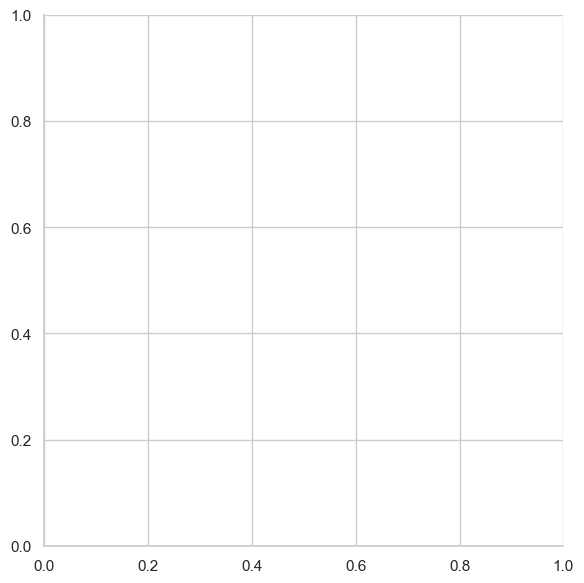

In [26]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")